In [135]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats

In [136]:
file_path = r'D:\Stations_data\Stations_data\Bani\all_months_copy'
os.chdir(file_path)

In [137]:
df1 = pd.read_csv('till_january.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [138]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [139]:
df3 = pd.read_csv('Temp_Rain_Bani.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
# df3_1hr.head()

In [140]:
date_mask1 = (df1_1hr.index >= '2020-12-20') & (df1_1hr.index < '2020-12-26')
date_mask2 = (df2_1hr.index >= '2020-12-20') & (df2_1hr.index < '2020-12-26')
date_mask3 = (df3_1hr.index >= '2020-12-20') & (df3_1hr.index < '2020-12-26')
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

In [141]:
type(SM_sensor1)

pandas.core.series.Series

In [142]:
work_df = pd.concat([SM_sensor1, SM_sensor2, SM_sensor3, SM_sensor4, SM_sensor5, SM_sensor6, SM_sensor7,
                     SM_sensor8, SM_sensor9, SM_sensor10, ST_sensor1, ST_sensor2, ST_sensor3, ST_sensor4,
                    ST_sensor5, ST_sensor6, ST_sensor7, ST_sensor8, ST_sensor9, ST_sensor10, Rainfall, Air_Temp], axis = 1)
work_df.tail()

,S1SM,S2SM,S3SM,S4SM,S5SM,S6SM,S7SM,S8SM,S9SM,S10SM,...,S3Temp,S4Temp,S5Temp,S6Temp,S7Temp,S8Temp,S9Temp,S10Temp,Int_Rainfall (mm),Temp (0C)
date,,,,,,,,,,,,,,,,,,,,,
2020-12-25 19:00:00,5.503333,10.266667,10.44,6.770000,9.131667,7.000000,15.916667,18.973333,NaN,6.350000,...,17.007833,19.102667,17.899833,19.407333,15.779833,17.689000,NaN,17.565167,0.0,11.4250
2020-12-25 20:00:00,5.488333,10.263333,10.44,6.770000,9.136667,7.000000,15.896667,18.960000,NaN,6.350000,...,17.027333,19.100333,17.932333,19.399667,15.690000,17.681333,NaN,17.583333,0.0,10.3500
2020-12-25 21:00:00,5.478333,10.260000,10.44,6.766667,9.138333,7.000000,15.863333,18.945000,NaN,6.356667,...,17.066500,19.100167,17.945500,19.386667,15.548333,17.693000,NaN,17.583333,0.0,9.6700
2020-12-25 22:00:00,5.473333,10.260000,10.44,6.760000,9.136667,6.998333,15.843333,18.923333,NaN,6.360000,...,17.086167,19.102833,17.973833,19.385667,15.385667,17.712167,NaN,17.604167,0.0,8.9325
2020-12-25 23:00:00,5.470000,10.258333,10.44,6.760000,9.138333,6.990000,15.816667,18.916667,NaN,6.360000,...,17.112000,19.089667,17.964833,19.380167,15.210833,17.720167,NaN,17.619667,0.0,8.5700


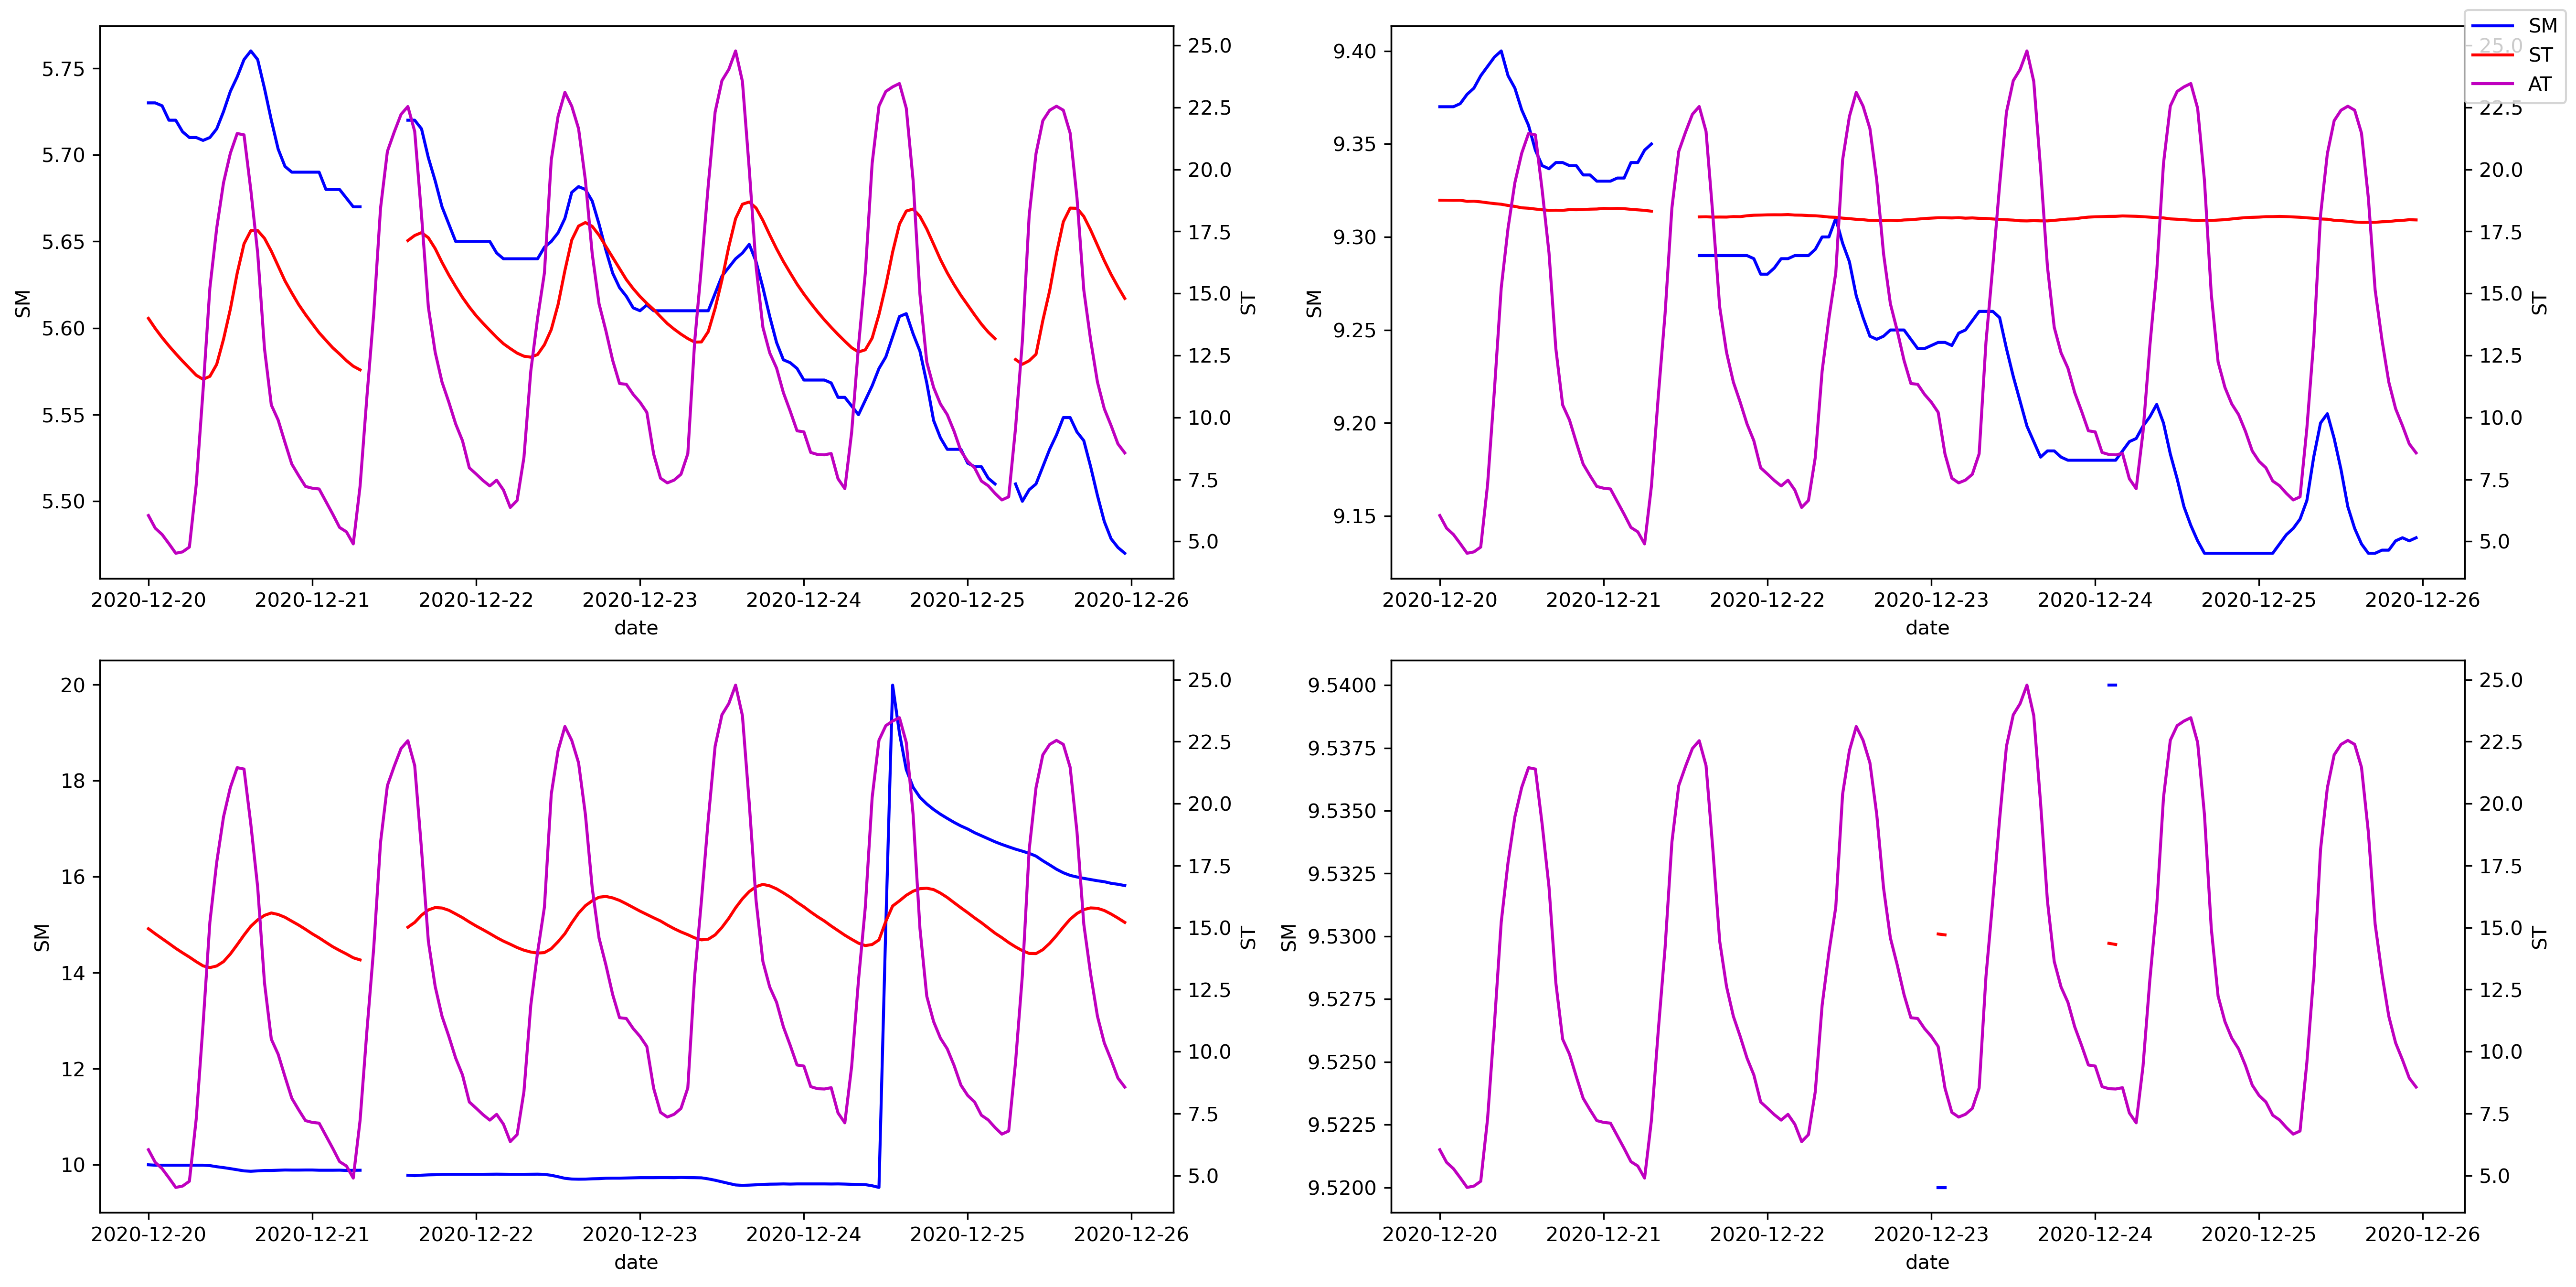

In [143]:
fg, ax = plt.subplots(2, 2, figsize=(9*2, 4*2.25), dpi=300)
ac1 = ax[0,0].twinx()
ax[0,0].plot(work_df.index, work_df.S1SM,'b' , label = 'SM')
ax[0,0].set(xlabel = 'date', ylabel = 'SM')
ac1.set(xlabel = 'date', ylabel = 'ST')
ac1.plot(work_df.index, work_df.S1Temp,'r' , label = 'ST')
ac1.plot(work_df.index, work_df['Temp (0C)'],'m' , label = 'AT')

ac2 = ax[0,1].twinx()
ax[0,1].plot(work_df.index, work_df.S5SM,'b')
ax[0,1].set(xlabel = 'date', ylabel = 'SM')
ac2.set(xlabel = 'date', ylabel = 'ST')
ac2.plot(work_df.index, work_df.S5Temp,'r' )
ac2.plot(work_df.index, work_df['Temp (0C)'],'m')

ac3 = ax[1,0].twinx()
ax[1,0].plot(work_df.index, work_df.S7SM,'b')
ax[1,0].set(xlabel = 'date', ylabel = 'SM')
ac3.set(xlabel = 'date', ylabel = 'ST')
ac3.plot(work_df.index, work_df.S7Temp,'r')
ac3.plot(work_df.index, work_df['Temp (0C)'],'m')

ac4 = ax[1,1].twinx()
ax[1,1].plot(work_df.index, work_df.S9SM,'b')
ax[1,1].set(xlabel = 'date', ylabel = 'SM')
ac4.set(xlabel = 'date', ylabel = 'ST')
ac4.plot(work_df.index, work_df.S9Temp,'r')
ac4.plot(work_df.index, work_df['Temp (0C)'],'m')

plt.tight_layout()
fg.legend();

In [144]:
max_S1SM_hour= SM_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2SM_hour= SM_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3SM_hour= SM_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4SM_hour= SM_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5SM_hour= SM_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6SM_hour= SM_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7SM_hour= SM_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8SM_hour= SM_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9SM_hour= SM_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10SM_hour= SM_sensor10.groupby(pd.Grouper(freq='D')).idxmax()

max_S1ST_hour= ST_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2ST_hour= ST_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3ST_hour= ST_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4ST_hour= ST_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5ST_hour= ST_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6ST_hour= ST_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7ST_hour= ST_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8ST_hour= ST_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9ST_hour= ST_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10ST_hour= ST_sensor10.groupby(pd.Grouper(freq='D')).idxmax()
max_AirT_hour= Air_Temp.groupby(pd.Grouper(freq='D')).idxmax()

In [145]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')
Air_Temp = Air_Temp.interpolate(method= 'quadratic')

In [146]:
## Soil Temperature and air temperature lag

# Temperature lags
# T_S1_lag = max_S1ST_hour - max_AirT_hour
# T_S5_lag = max_S5ST_hour - max_AirT_hour
# T_S6_lag = max_S6ST_hour - max_AirT_hour
# T_S7_lag = max_S7ST_hour - max_AirT_hour
# T_S8_lag = max_S8ST_hour - max_AirT_hour
# T_S9_lag = max_S9ST_hour - max_AirT_hour

#Temperature and moisture lags
# SMT_S1_lag = max_S1ST_hour - max_S1SM_hour
# SMT_S5_lag = max_S5ST_hour - max_S5SM_hour
# SMT_S6_lag = max_S6ST_hour - max_S6SM_hour
# SMT_S7_lag = max_S7ST_hour - max_S7SM_hour
# SMT_S8_lag = max_S8ST_hour - max_S8SM_hour
# SMT_S9_lag = max_S9ST_hour - max_S9SM_hour

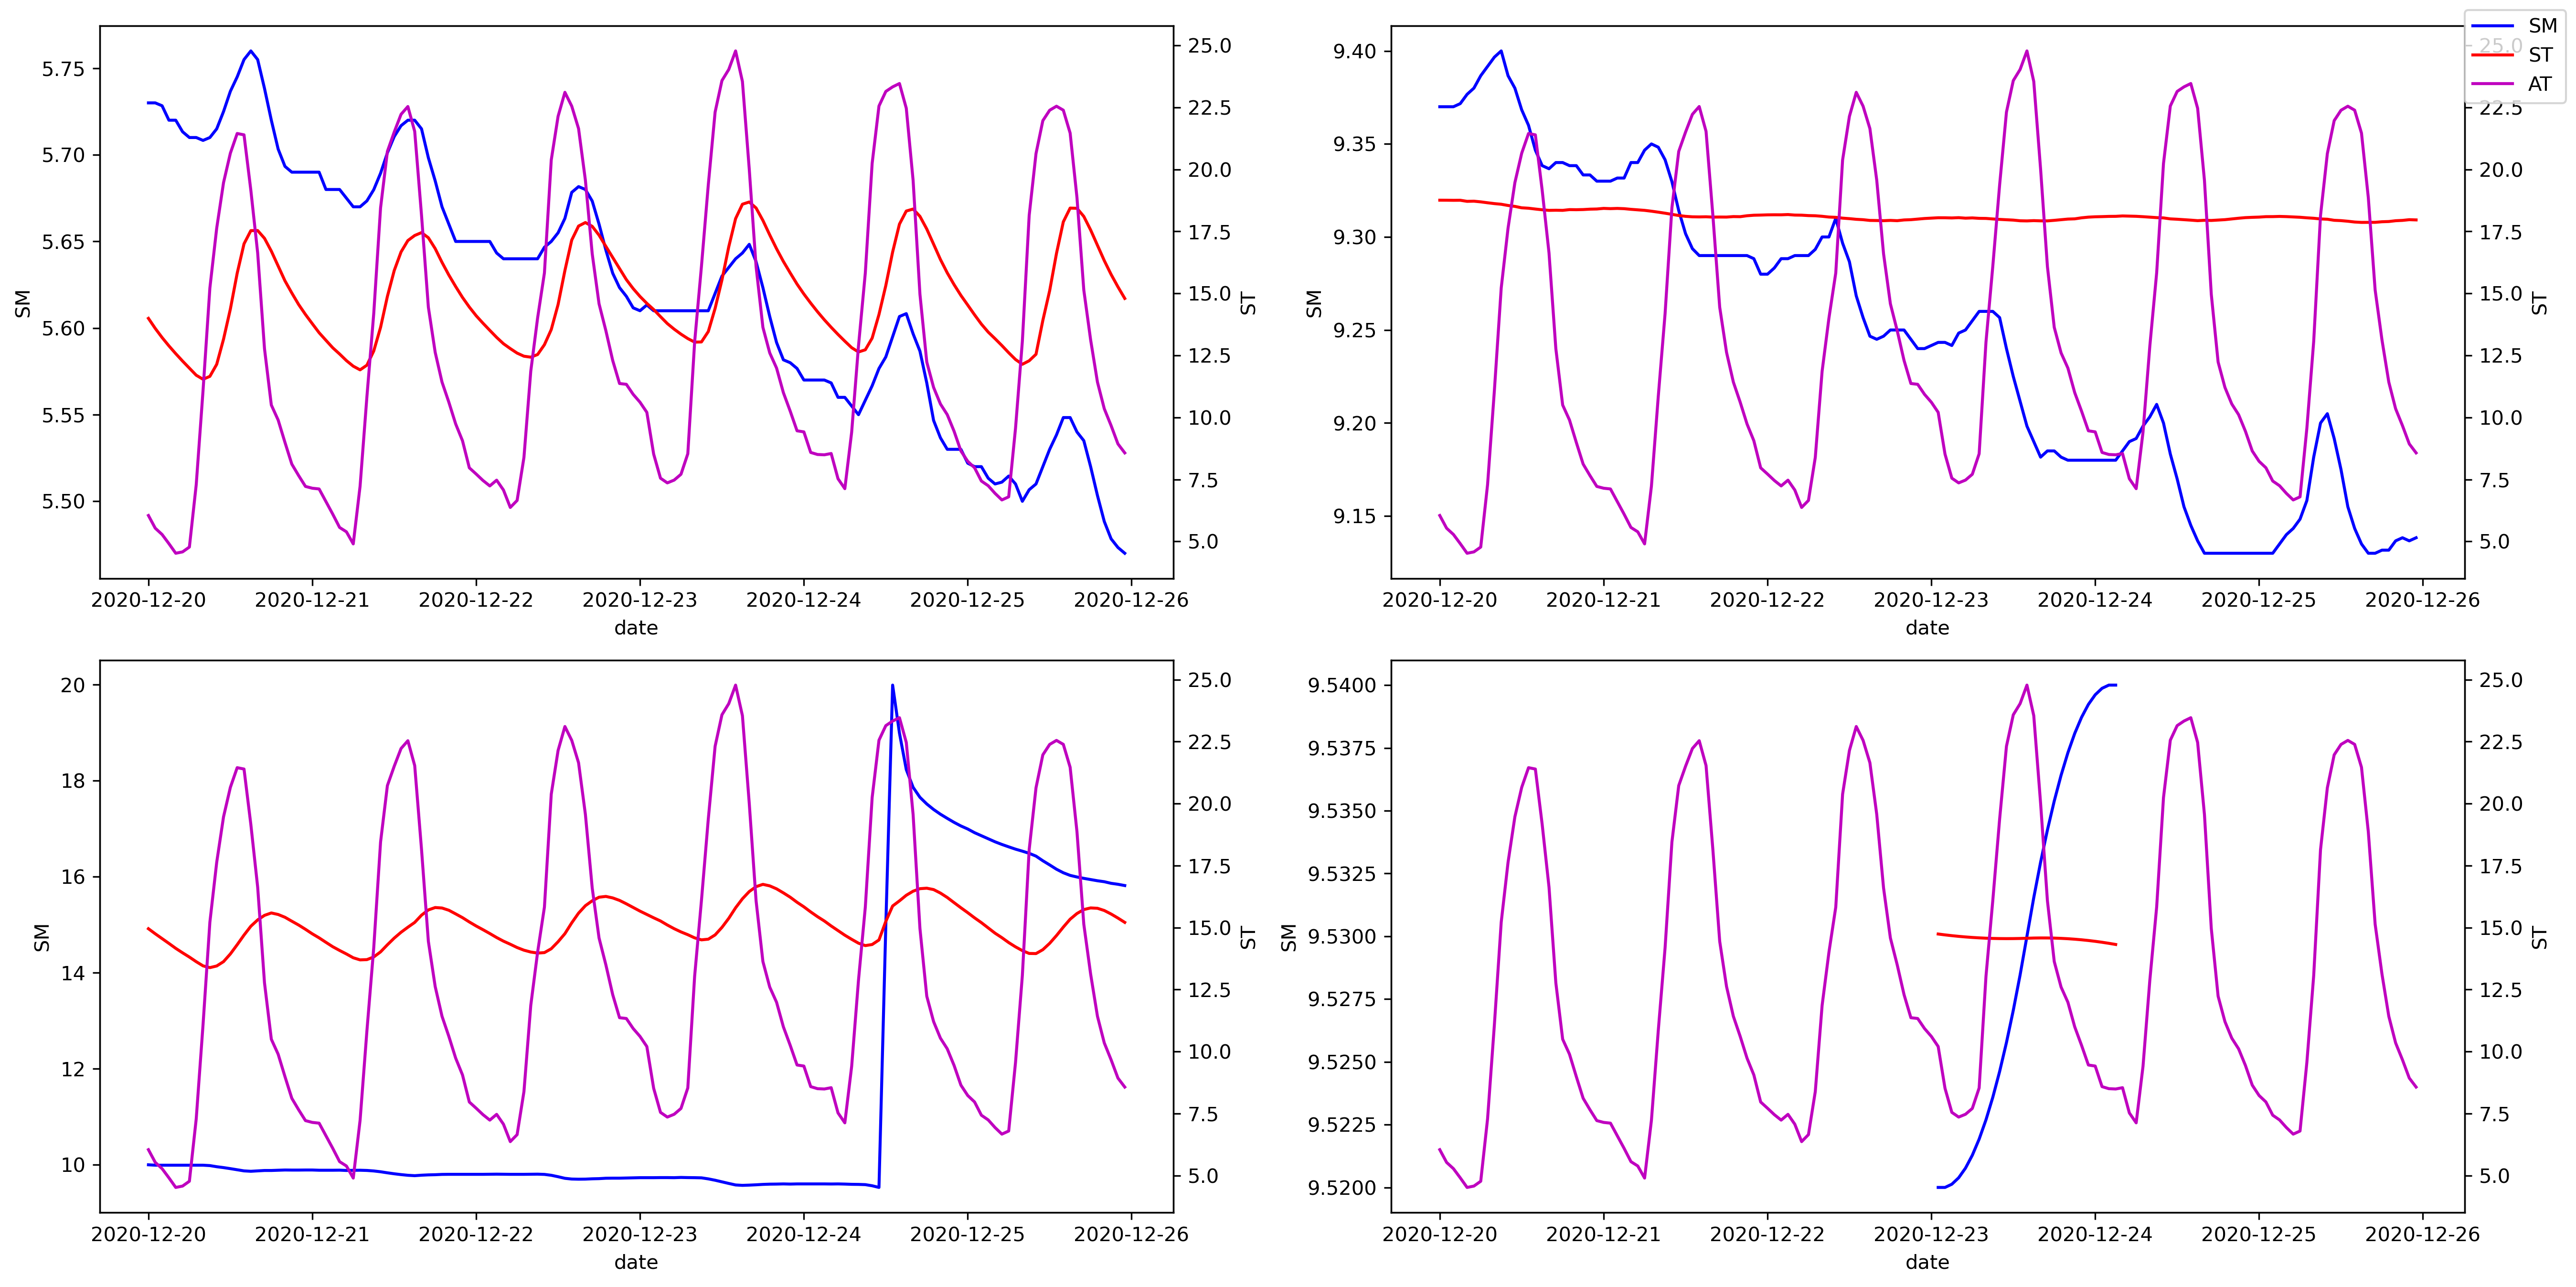

In [147]:
fg, ax = plt.subplots(2, 2, figsize=(9*2, 4*2.25), dpi=300)
ac1 = ax[0,0].twinx()
ax[0,0].plot(SM_sensor1,'b' , label = 'SM')
ax[0,0].set(xlabel = 'date', ylabel = 'SM')
ac1.set(xlabel = 'date', ylabel = 'ST')
ac1.plot(ST_sensor1,'r' , label = 'ST')
ac1.plot(Air_Temp,'m' , label = 'AT')

ac2 = ax[0,1].twinx()
ax[0,1].plot(SM_sensor5,'b')
ax[0,1].set(xlabel = 'date', ylabel = 'SM')
ac2.set(xlabel = 'date', ylabel = 'ST')
ac2.plot(ST_sensor5,'r' )
ac2.plot(Air_Temp,'m')

ac3 = ax[1,0].twinx()
ax[1,0].plot(SM_sensor7,'b')
ax[1,0].set(xlabel = 'date', ylabel = 'SM')
ac3.set(xlabel = 'date', ylabel = 'ST')
ac3.plot(ST_sensor7,'r')
ac3.plot(Air_Temp,'m')

ac4 = ax[1,1].twinx()
ax[1,1].plot(SM_sensor9,'b')
ax[1,1].set(xlabel = 'date', ylabel = 'SM')
ac4.set(xlabel = 'date', ylabel = 'ST')
ac4.plot(ST_sensor9,'r')
ac4.plot(Air_Temp,'m')

plt.tight_layout()
fg.legend();


In [148]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [149]:


# print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
# # Null - Hypothesis test for Sensor-11 Soil Moisture
# print('############ Sensor - 1 ############')
# S1_SM = SM_sensor1
# result_S1_SM = adfuller(S1_SM)
# print('ADF Statistics: %f' % result_S1_SM[0])
# print('p-value: %f' % result_S1_SM[1])
# print('Critical Values:')
# for key, value in result_S1_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S1_SM[0] < result_S1_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# # Null - Hypothesis test for Sensor-15 Soil Moisture
# print('############ Sensor - 5 ############')
# S5_SM = SM_sensor5
# result_S5_SM = adfuller(S5_SM)
# print('ADF Statistics: %f' % result_S5_SM[0])
# print('p-value: %f' % result_S5_SM[1])
# print('Critical Values:')
# for key, value in result_S5_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_SM[0] < result_S5_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-17 Soil Moisture
# print('############ Sensor - 17 ############')
# S7_SM = SM_sensor7
# result_S7_SM = adfuller(S7_SM)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# # Null - Hypothesis test for Sensor-19 Soil Moisture
# print('############ Sensor - 19 ############')
# # S9_SM = SM_sensor9
# # result_S9_SM = adfuller(S9_SM)
# # print('ADF Statistics: %f' % result_S9_SM[0])
# # print('p-value: %f' % result_S9_SM[1])
# # print('Critical Values:')
# # for key, value in result_S9_SM[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S9_SM[0] < result_S9_SM[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")
    

In [150]:
# Null - Hypothesis test for Sensor-1 Soil Temperature
print('-#-#-#-#-#-#-#-#-#-# { Soil Temeperature} #-#-#-#-#-#-#-#-#-#-')
print('-------------- Soil Temperetaure --------------')
print('############ Sensor - 11 ############')
S1_ST = ST_sensor1.values
result_S1_ST = adfuller(S1_ST)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-5 Soil Temperature
print('############ Sensor - 15 ############')
S5_ST = ST_sensor5.values
result_S5_ST = adfuller(S5_ST)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# Null - Hypothesis test for Sensor-17 Soil Temperature
print('############ Sensor - 17 ############')
S7_ST = ST_sensor7.values
result_S7_ST = adfuller(S7_ST)
print('ADF Statistics: %f' % result_S7_ST[0])
print('p-value: %f' % result_S7_ST[1])
print('Critical Values:')
for key, value in result_S7_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S7_ST[0] < result_S7_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# Null - Hypothesis test for Sensor-9 Soil Moisture
# # print('############ Sensor - 19 ############')
# S9_ST = ST_sensor9.values
# result_S9_ST = adfuller(S9_ST)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")

-#-#-#-#-#-#-#-#-#-# { Soil Temeperature} #-#-#-#-#-#-#-#-#-#-
-------------- Soil Temperetaure --------------
############ Sensor - 11 ############
ADF Statistics: -6.402814
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 15 ############
ADF Statistics: -4.209129
p-value: 0.000636
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 17 ############
ADF Statistics: -1.391467
p-value: 0.586360
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Failed to Reject Ho - Time Series is Non-Stationary


In [151]:
print('############ Air Temp. ############')
AT_1 = Air_Temp.values
result_AT = adfuller(AT_1)
print('ADF Statistics: %f' % result_AT[0])
print('p-value: %f' % result_AT[1])
print('Critical Values:')
for key, value in result_AT[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_AT[0] < result_AT[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

############ Air Temp. ############
ADF Statistics: -4.230148
p-value: 0.000586
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary


## Stationarity check after first order differencing

In [152]:
# # Differencing to make the Non-stationary time-series into stationaty

# # def differncing ():
# #     for i in 
# print('-#-#-#-#-#-#-#-#-#-# { Soil Moisture} #-#-#-#-#-#-#-#-#-#-')
# print('############ Sensor - 11 ############')
# S1_SM_Diff = np.diff(SM_sensor1)
# # plt.plot(S1_SM_Diff)
# len(S1_SM_Diff)

# # S1_SM = SM_sensor1.values
# result_S1_SM = adfuller(S1_SM_Diff)
# print('ADF Statistics: %f' % result_S1_SM[0])
# print('p-value: %f' % result_S1_SM[1])
# print('Critical Values:')
# for key, value in result_S1_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S1_SM[0] < result_S1_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# print('############ Sensor - 15 ############')
# S5_SM_Diff = np.diff(SM_sensor5)
# len(S5_SM_Diff)

# # S1_SM = SM_sensor1.values
# result_S5_SM = adfuller(S5_SM_Diff)
# print('ADF Statistics: %f' % result_S5_SM[0])
# print('p-value: %f' % result_S5_SM[1])
# print('Critical Values:')
# for key, value in result_S5_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S5_SM[0] < result_S5_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
    
# print('############ Sensor - 17 ############')
# S7_SM_Diff = np.diff(SM_sensor7)
# len(S7_SM_Diff)

# # S1_SM = SM_sensor1.values
# result_S7_SM = adfuller(S7_SM_Diff)
# print('ADF Statistics: %f' % result_S7_SM[0])
# print('p-value: %f' % result_S7_SM[1])
# print('Critical Values:')
# for key, value in result_S7_SM[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S7_SM[0] < result_S7_SM[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    

    
# # print('############ Sensor - 19 ############')
# # S9_SM_Diff = np.diff(SM_sensor9)
# # len(S9_SM_Diff)

# # S1_SM = SM_sensor1.values
# # result_S9_SM = adfuller(S9_SM_Diff)
# # print('ADF Statistics: %f' % result_S9_SM[0])
# # print('p-value: %f' % result_S9_SM[1])
# # print('Critical Values:')
# # for key, value in result_S9_SM[4].items():
# #     print('\t%s: %.3f' % (key, value))
    
# # if result_S9_SM[0] < result_S9_SM[4]["5%"]:
# #     print("Reject Ho - Time Series is Stationary")
# # else:
# #     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
# fig, ax = plt.subplots(2, 2, figsize = (9*2, 4*2.3), dpi = 300)

# ax[0,0].plot(S1_SM_Diff, 'green', label = 'SM after differencing')
# ax[0,0].set(title='S11', ylabel = 'soil moisture')

# ax[0,1].plot(S5_SM_Diff, 'green')
# ax[0,1].set(title='S15', ylabel = 'soil moisture')

# ax[1,0].plot(S7_SM_Diff, 'green')
# ax[1,0].set(title='S17', ylabel = 'soil moisture')

# # ax[1,1].plot(S9_SM_Diff, 'green')
# # ax[1,1].set(title='S19', ylabel = 'soil moisture')

# fig.legend(loc = 'upper center')
# plt.tight_layout()
# fig.show()

-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-
############ Sensor - 11 ############
ADF Statistics: -8.336471
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary
############ Sensor - 15 ############
ADF Statistics: -5.903036
p-value: 0.000000
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578
Reject Ho - Time Series is Stationary
############ Sensor - 17 ############
ADF Statistics: -7.273564
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary


<ipython-input-159-dd1ce2a41f34>:88: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


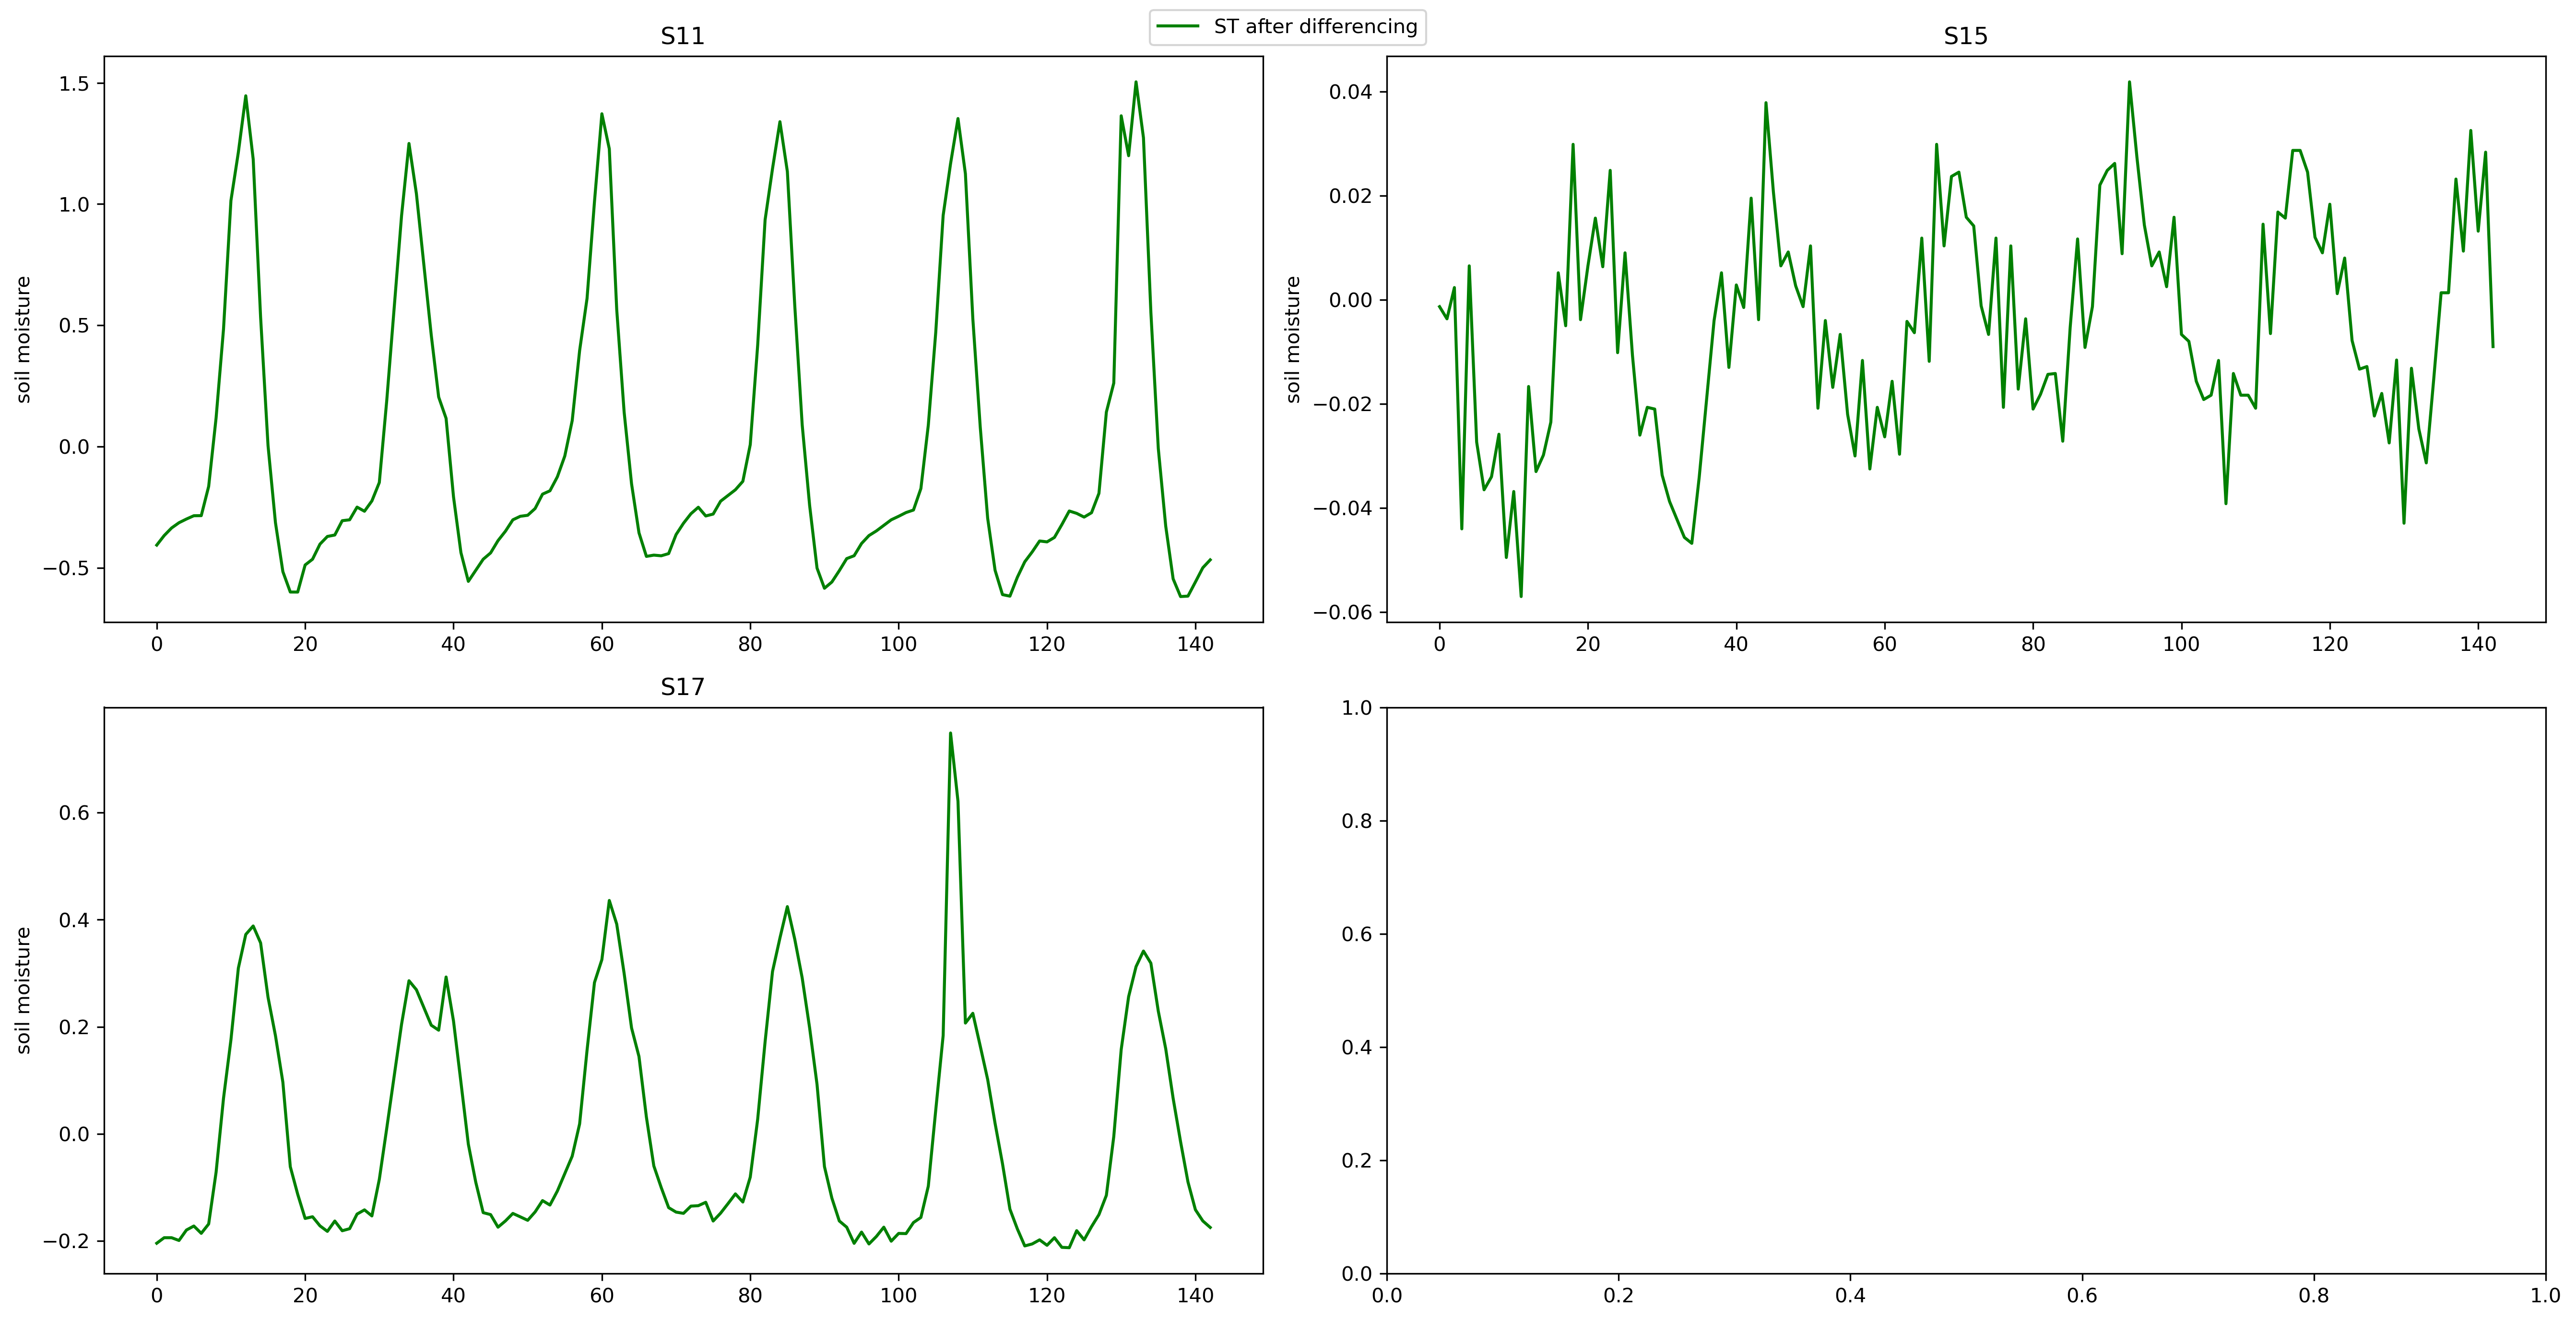

In [159]:
# Differencing to make the Non-stationary time-series into stationaty

# def differncing ():
#     for i in 
print('-#-#-#-#-#-#-#-#-#-# { Soil Temperature} #-#-#-#-#-#-#-#-#-#-')
print('############ Sensor - 11 ############')
S1_ST_Diff = np.diff(ST_sensor1)
len(S1_ST_Diff)

result_S1_ST = adfuller(S1_ST_Diff)
print('ADF Statistics: %f' % result_S1_ST[0])
print('p-value: %f' % result_S1_ST[1])
print('Critical Values:')
for key, value in result_S1_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S1_ST[0] < result_S1_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
print('############ Sensor - 15 ############')
S5_ST_Diff = np.diff(ST_sensor5)
len(S5_ST_Diff)

result_S5_ST = adfuller(S5_ST_Diff)
print('ADF Statistics: %f' % result_S5_ST[0])
print('p-value: %f' % result_S5_ST[1])
print('Critical Values:')
for key, value in result_S5_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S5_ST[0] < result_S5_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

    
print('############ Sensor - 17 ############')
S7_ST_Diff = np.diff(ST_sensor7)
len(S7_ST_Diff)

result_S7_ST = adfuller(S7_ST_Diff)
print('ADF Statistics: %f' % result_S7_ST[0])
print('p-value: %f' % result_S7_ST[1])
print('Critical Values:')
for key, value in result_S7_ST[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_S7_ST[0] < result_S7_ST[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    

# print('############ Sensor - 19 ############')
# S9_ST_Diff = np.diff(ST_sensor9)
# len(S9_ST_Diff)

# result_S9_ST = adfuller(S9_ST_Diff)
# print('ADF Statistics: %f' % result_S9_ST[0])
# print('p-value: %f' % result_S9_ST[1])
# print('Critical Values:')
# for key, value in result_S9_ST[4].items():
#     print('\t%s: %.3f' % (key, value))
    
# if result_S9_ST[0] < result_S9_ST[4]["5%"]:
#     print("Reject Ho - Time Series is Stationary")
# else:
#     print("Failed to Reject Ho - Time Series is Non-Stationary")
    
fig, ax = plt.subplots(2, 2, figsize = (9*2, 4*2.3), dpi = 300)

ax[0,0].plot(S1_ST_Diff, 'green', label = 'ST after differencing')
ax[0,0].set(title='S11', ylabel = 'soil moisture')

ax[0,1].plot(S5_ST_Diff, 'green')
ax[0,1].set(title='S15', ylabel = 'soil moisture')

ax[1,0].plot(S7_ST_Diff, 'green')
ax[1,0].set(title='S17', ylabel = 'soil moisture')

# ax[1,1].plot(S9_ST_Diff, 'green')
# ax[1,1].set(title='S19', ylabel = 'soil moisture')

fig.legend(loc = 'upper center')
plt.tight_layout()
fig.show()

############ Air Temp ############
ADF Statistics: -10.423588
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579
Reject Ho - Time Series is Stationary


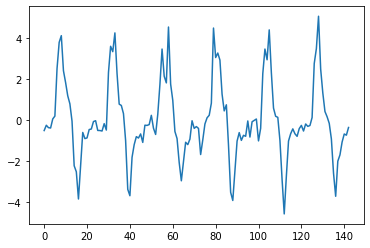

In [154]:
print('############ Air Temp ############')
AT_Diff = np.diff(Air_Temp)
result_AT_2 = adfuller(AT_Diff)
print('ADF Statistics: %f' % result_AT_2[0])
print('p-value: %f' % result_AT_2[1])
print('Critical Values:')
for key, value in result_AT_2[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result_AT_2[0] < result_AT_2[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")
    
plt.plot(AT_Diff);

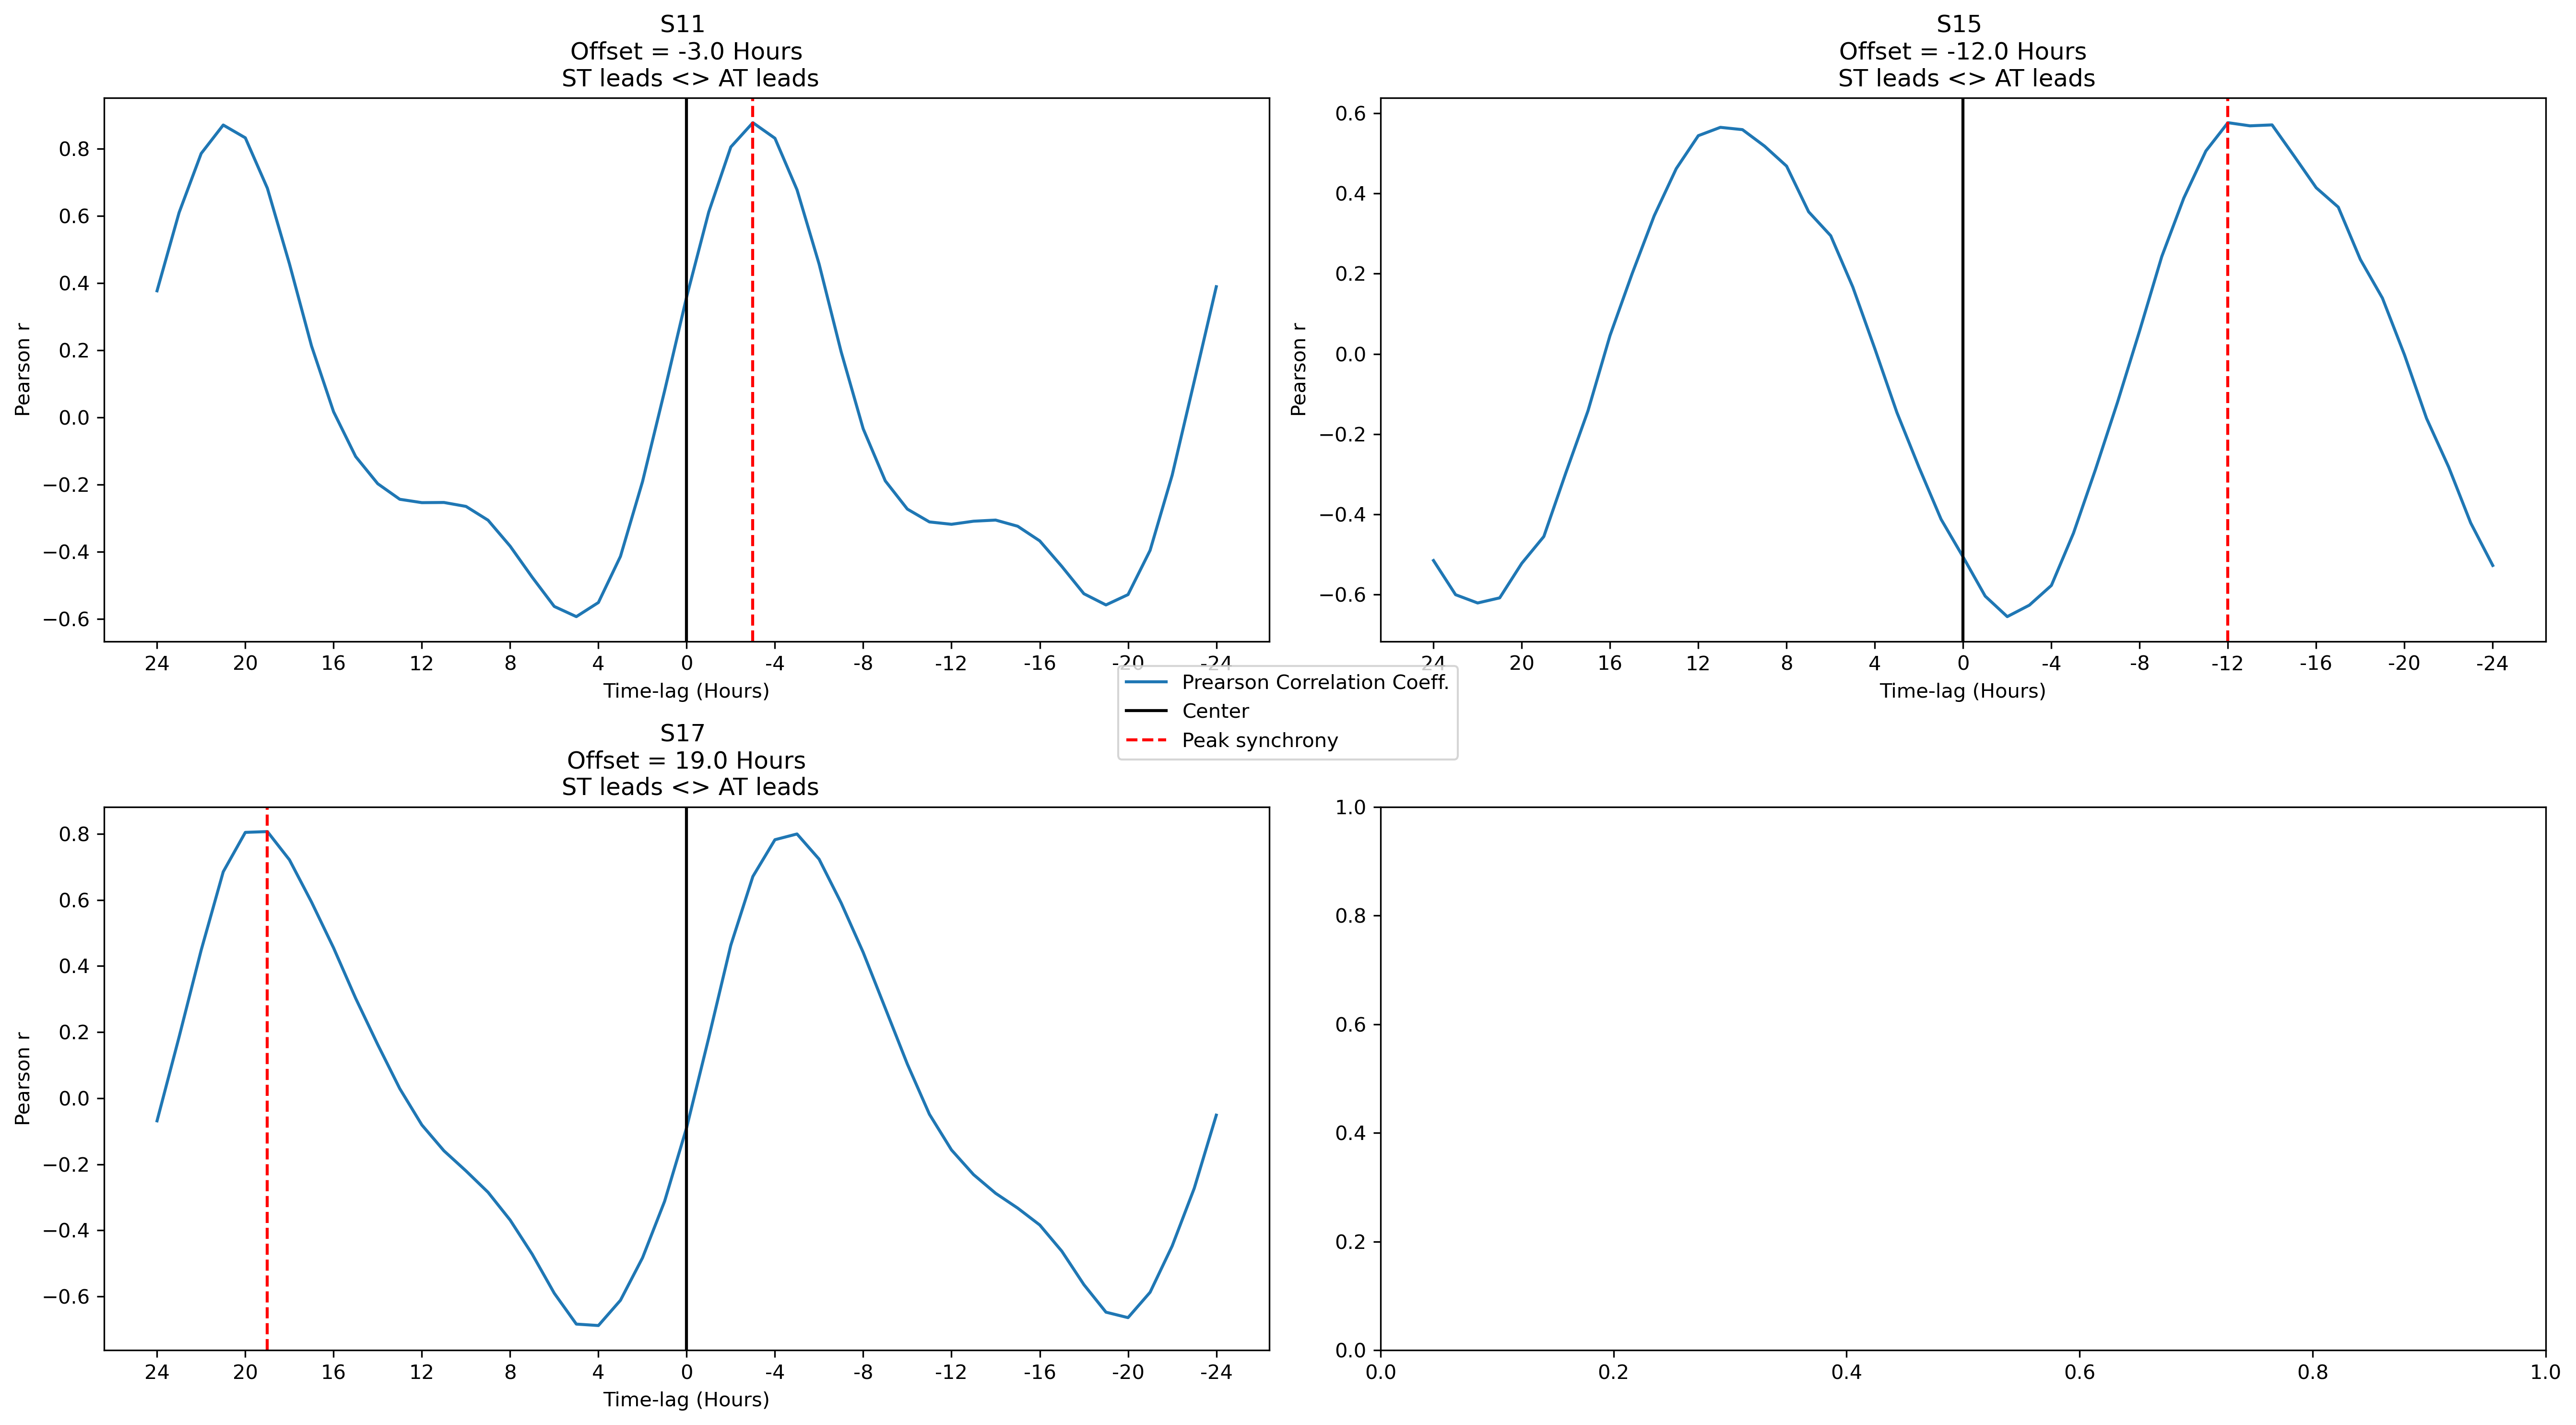

In [155]:
# Time lagged cross correlation

def crosscorr (datax, datay, lag=0, wrap = False):
    """
    Lag-N Cross correlaton.
    Shifted data filled with NaNs
    
    Parameters
    --------
    lag : int, default 0
    dataX, datay : pandas.Series objects of equal length
    
    
    Returns
    --------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else:
        return datax.corr(datay.shift(lag))
    

S1_d1 = pd.Series(S1_ST_Diff)
S5_d1 = pd.Series(S5_ST_Diff)
S7_d1 = pd.Series(S7_ST_Diff)
# S9_d1 = pd.Series(S9_ST_Diff)

# S1_d1 = pd.Series(S1_SM_Diff)
# S5_d1 = pd.Series(S5_SM_Diff)
# S7_d1 = pd.Series(S7_SM_Diff)
# S9_d1 = pd.Series(S9_SM_Diff)

AT_d2 = pd.Series(AT_Diff)

S1_rs = [crosscorr(S1_d1, AT_d2, lag) for lag in range(-24, 25)]
S5_rs = [crosscorr(S5_d1, AT_d2, lag) for lag in range(-24, 25)]
S7_rs = [crosscorr(S7_d1, AT_d2, lag) for lag in range(-24, 25)]
# S9_rs = [crosscorr(S9_d1, AT_d2, lag) for lag in range(-24, 25)]

S1_offset = np.floor(len(S1_rs)/2)-np.argmax(S1_rs)
S5_offset = np.floor(len(S5_rs)/2)-np.argmax(S5_rs)
S7_offset = np.floor(len(S7_rs)/2)-np.argmax(S7_rs)
# S9_offset = np.floor(len(S9_rs)/2)-np.argmax(S9_rs)

fig, ax = plt.subplots(2,2, figsize = (9*2, 5*2), dpi = 300)
ax[0,0].plot(S1_rs, label = 'Prearson Correlation Coeff.')
ax[0,0].axvline(np.floor(len(S1_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0,0].axvline(np.argmax(S1_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0,0].set(title=f'S11 \n Offset = {S1_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[0,1].plot(S5_rs)
ax[0,1].axvline(np.floor(len(S5_rs)/2), color = 'k', linestyle='-')
ax[0,1].axvline(np.argmax(S5_rs), color='r', linestyle='--')
ax[0,1].set(title=f'S15 \n Offset = {S5_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[0,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1,0].plot(S7_rs)
ax[1,0].axvline(np.floor(len(S7_rs)/2), color = 'k', linestyle='-')
ax[1,0].axvline(np.argmax(S7_rs), color='r', linestyle='--')
ax[1,0].set(title=f'S17 \n Offset = {S7_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1,0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1,0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

# ax[1,1].plot(S9_rs)
# ax[1,1].axvline(np.floor(len(S9_rs)/2), color = 'k', linestyle='-')
# ax[1,1].axvline(np.argmax(S9_rs), color='r', linestyle='--')
# ax[1,1].set(title=f'S19 \n Offset = {S9_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
# ax[1,1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
# ax[1,1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

fig.legend(loc = 'center')
plt.tight_layout();

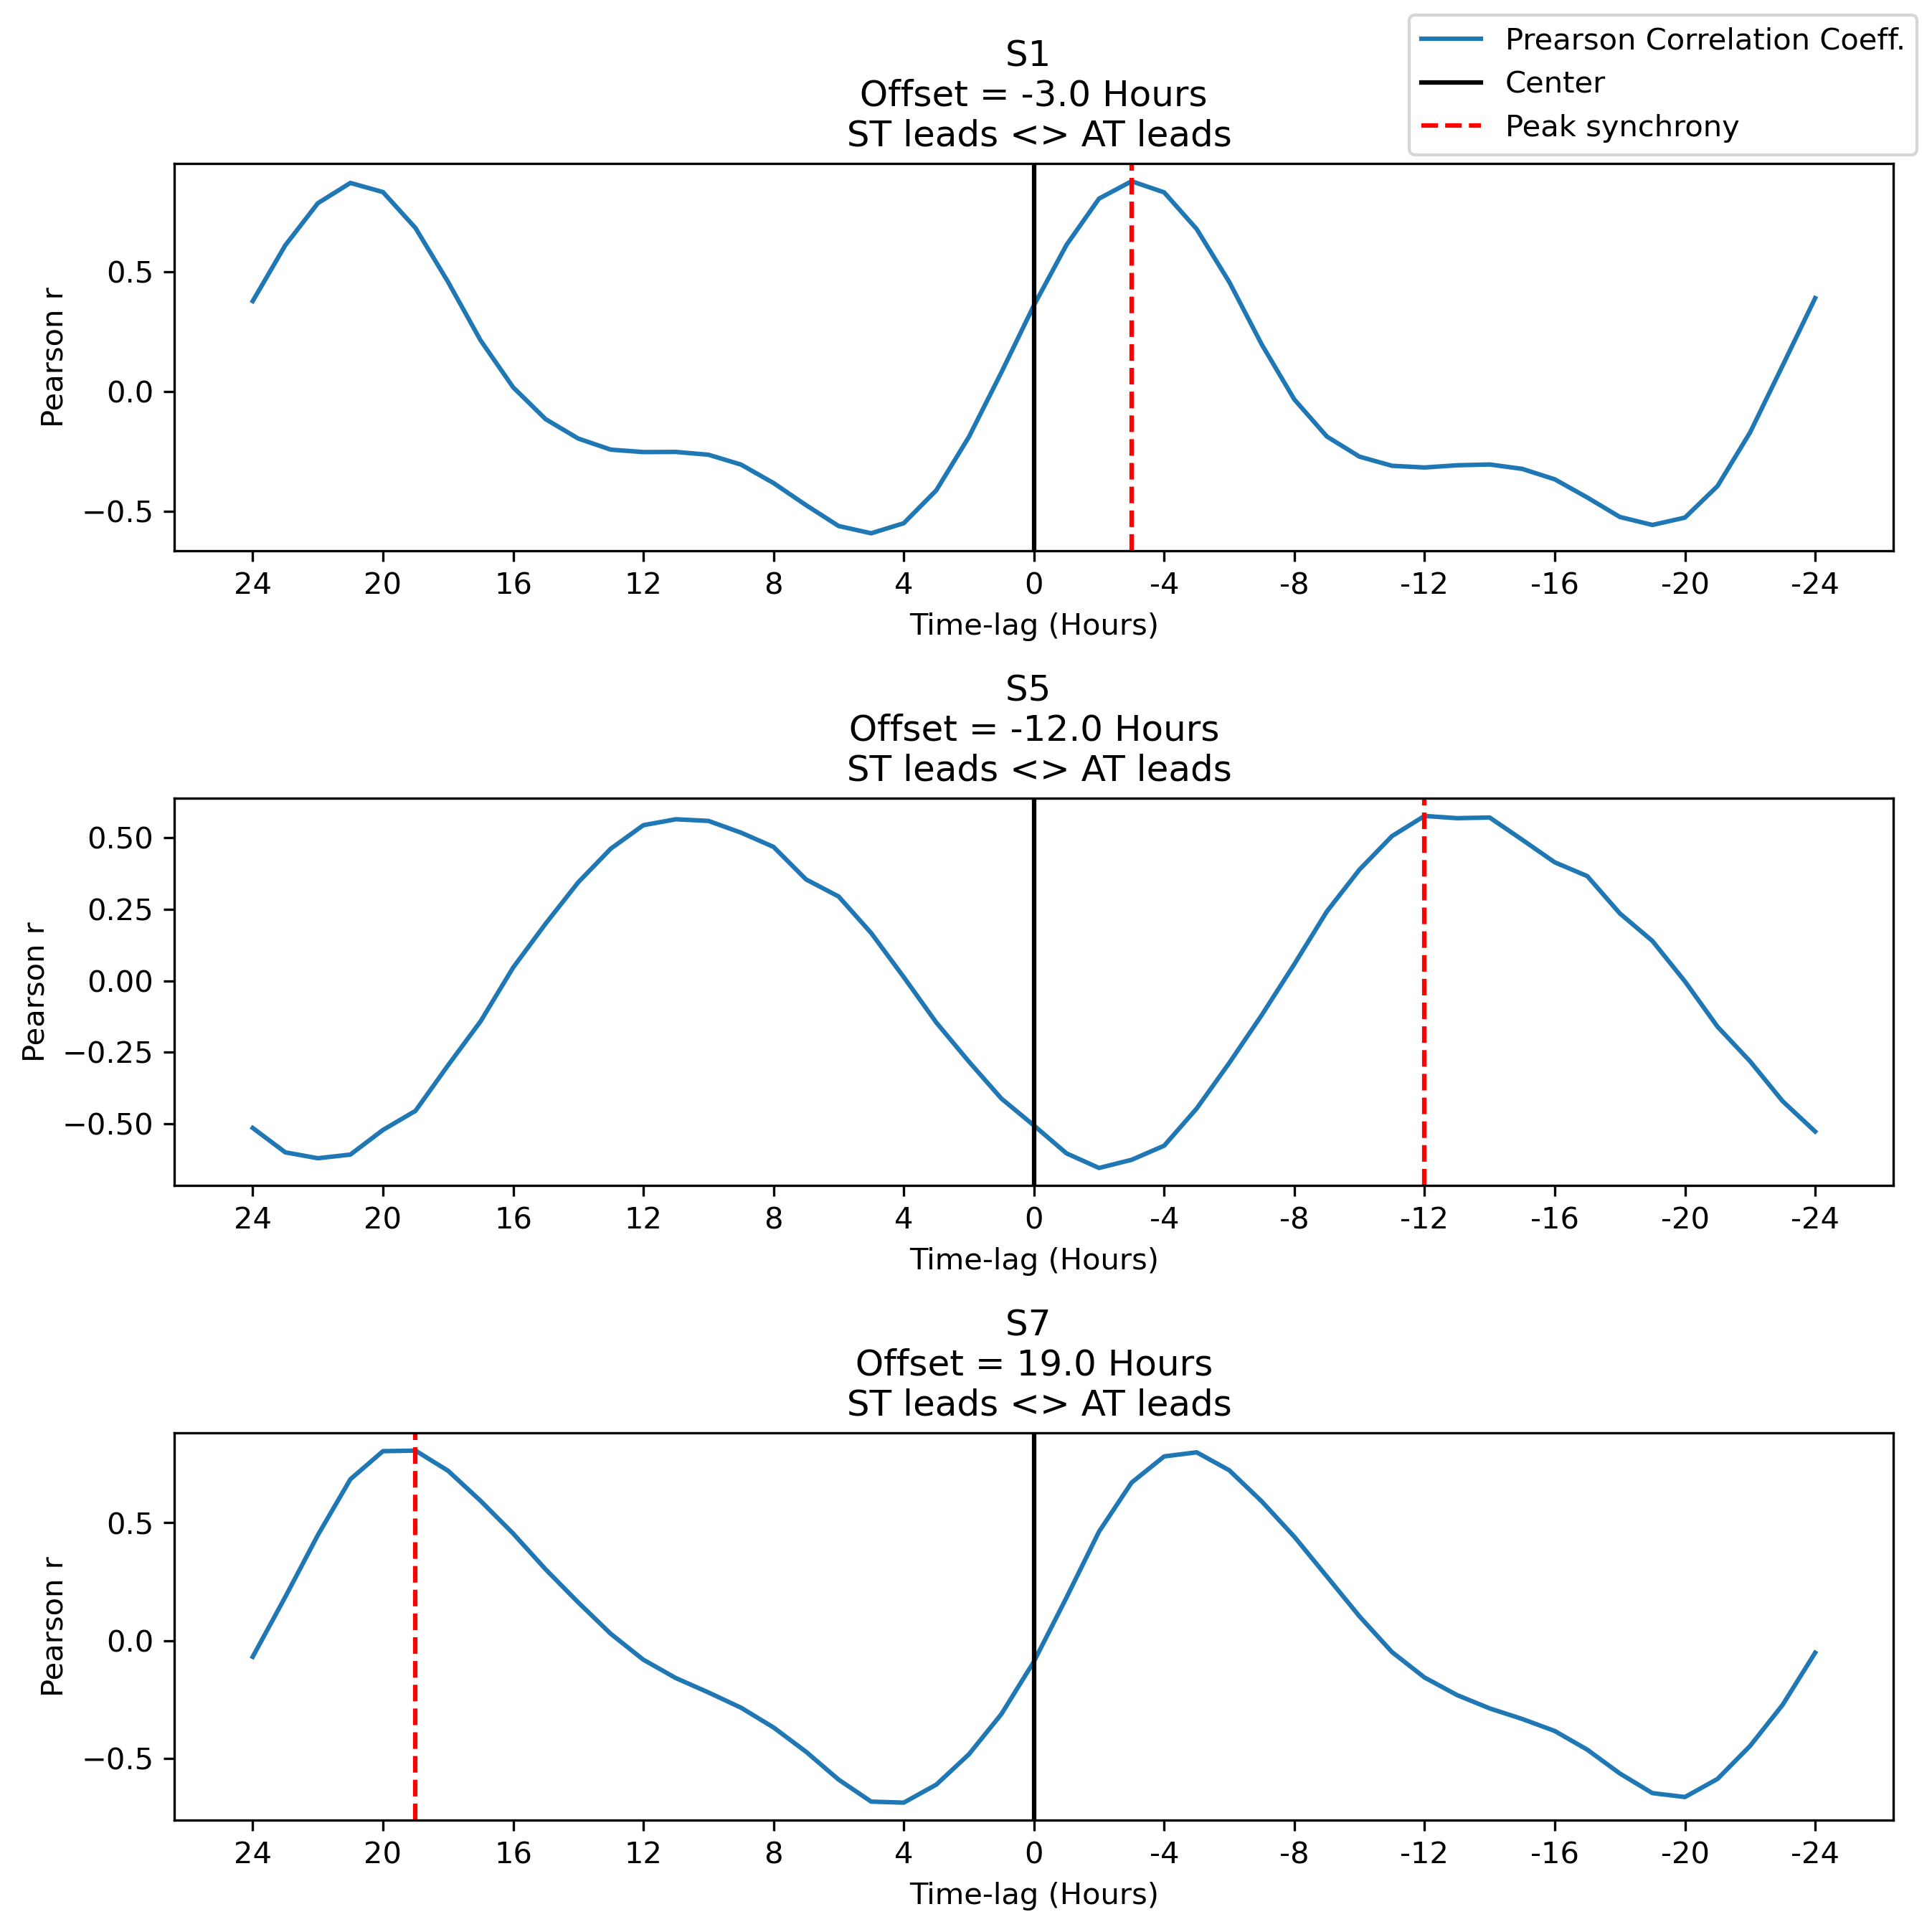

In [156]:
fig, ax = plt.subplots(3,1, figsize = (9, 9), dpi = 300)
ax[0].plot(S1_rs, label = 'Prearson Correlation Coeff.')
ax[0].axvline(np.floor(len(S1_rs)/2), color = 'k', linestyle='-', label = 'Center')
ax[0].axvline(np.argmax(S1_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax[0].set(title=f'S1 \n Offset = {S1_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)',
            ylabel = 'Pearson r')
ax[0].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[0].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[1].plot(S5_rs)
ax[1].axvline(np.floor(len(S5_rs)/2), color = 'k', linestyle='-')
ax[1].axvline(np.argmax(S5_rs), color='r', linestyle='--')
ax[1].set(title=f'S5 \n Offset = {S5_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[1].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[1].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])

ax[2].plot(S7_rs)
ax[2].axvline(np.floor(len(S7_rs)/2), color = 'k', linestyle='-')
ax[2].axvline(np.argmax(S7_rs), color='r', linestyle='--')
ax[2].set(title=f'S7 \n Offset = {S7_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax[2].set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax[2].set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])
fig.legend(loc = 'upper right')
plt.tight_layout();

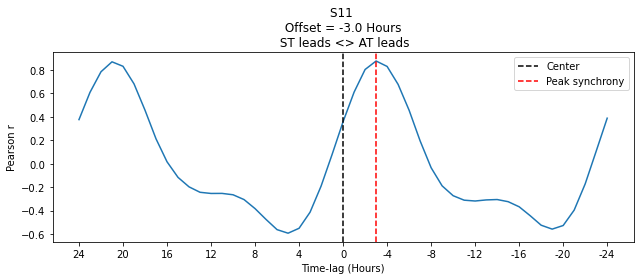

In [157]:
fig, ax = plt.subplots(1,1, figsize =(9, 4))
ax.plot(S1_rs)
ax.axvline(np.floor(len(S1_rs)/2), color = 'k', linestyle='--', label = 'Center')
ax.axvline(np.argmax(S1_rs), color='r', linestyle='--', label = 'Peak synchrony')
ax.set(title=f'S11 \n Offset = {S1_offset} Hours \n ST leads <> AT leads', xlabel = 'Time-lag (Hours)', ylabel = 'Pearson r')
ax.set_xticks([0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48])
ax.set_xticklabels([24, 20, 16, 12, 8, 4, 0, -4, -8, -12, -16, -20, -24])
ax.legend()
plt.tight_layout()

In [158]:
print('Sensor-1 max. rs value:', np.max(S1_rs))
print('Sensor-5 max. rs value:', np.max(S5_rs))
print('Sensor-7 max. rs value:', np.max(S7_rs))
# print('Sensor-9 max. rs value:', np.max(S9_rs))

Sensor-1 max. rs value: 0.877344099777163
Sensor-5 max. rs value: 0.5765633762802121
Sensor-7 max. rs value: 0.8067806211023011
